# Test the performance of the model

## Set working directory

In [8]:
# if get error "ImportError: No module named utils"
# change working directory

# ONLY NEED TO RUN THIS CELL ONCE

import os
os.chdir('./stage1')
os.getcwd()

'/Users/mingrenshen/PycharmProjects/MedImgAnalysis/stage1'

##  load the library

In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## load the trained Faster R-CNN model

## load the data

In [11]:
#load Data
root = './Data'
#dataset = MultiDetectionDataset(data_dir=root, split='train')
dataset_test = DetectionDataset(data_dir=root, split='test')
bbox_label_names = ('Bleeding')

In [13]:
# DataSet Statistics
#print('total number of training images: ', len(dataset))
print('total number of test images: ', len(dataset_test))
print('type of defects: ', bbox_label_names)

('total number of test images: ', 22)
('type of defects: ', 'Bleeding')


## load the trained Faster R-CNN model

In [15]:
use_gpu = False
proposal_params = {'min_size': 8}
model = FasterRCNNVGG16(n_fg_class=1, 
                        pretrained_model='../Archive/Models/20181202/snapshot_model_100000_20181202.npz', 
                        ratios=[ 0.5, 1, 1.5, 2, 2.5, 3, 3.5,4],anchor_scales=[1, 4, 8, 16], min_size=1000, 
                        max_size=1000,proposal_creator_params=proposal_params)

if use_gpu:
    chainer.cuda.get_device_from_id(0).use()
    model.to_gpu()
    
bbox_label_names = ('Bleeding')

[[552. 358. 644. 474.]]


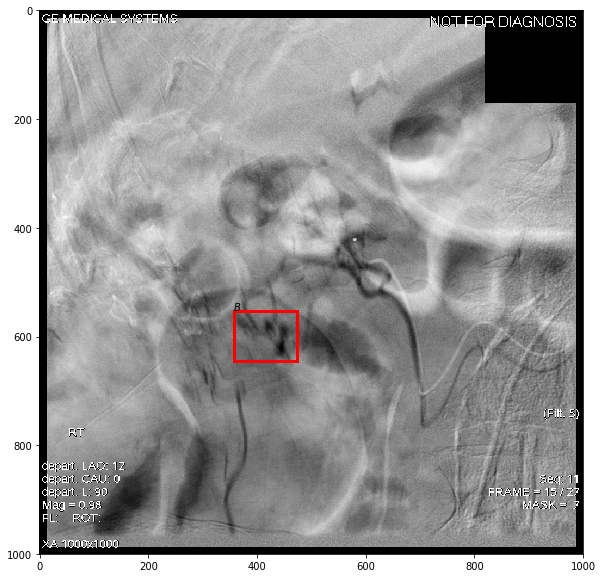

In [26]:
# Another Figure
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1, 1, 1)
img, bbox, label = dataset_test[15]
visualization.vis_bbox(img, bbox, label, label_names=bbox_label_names, ax=ax1)
plt.show()

### plot first graphe

[[116.90193 577.9849  234.62566 726.8553 ]
 [775.1829  411.35696 893.9399  500.6212 ]]
[[552. 358. 644. 474.]]


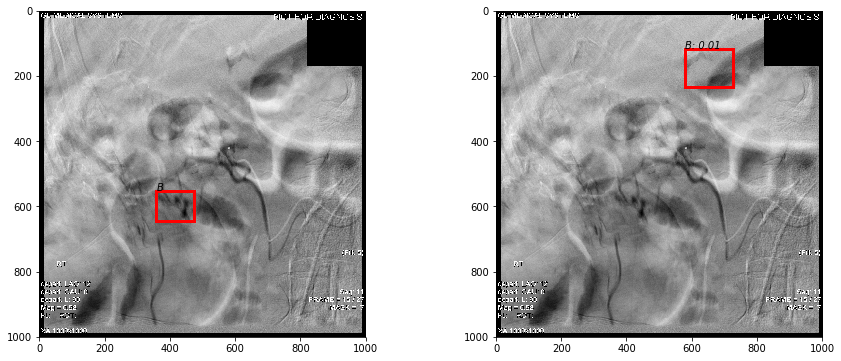

In [31]:
# Prediction of first image
img_1, bbs_1, lbs1 = dataset_test[15]
model.score_thresh = 0.0001
bboxes, labels, scores = model.predict([img_1])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1, 2, 2)
ax2 = fig.add_subplot(1, 2, 1)
# plot prediction
visualization.vis_bbox(img_1, bboxes[0], labels[0], scores[0], label_names=bbox_label_names, ax=ax1)
# plot ground truth
visualization.vis_bbox(img_1, bbs_1, lbs1, label_names=bbox_label_names,ax=ax2)
fig.savefig("test1.png")

[[511.4437   360.34167  625.9701   496.8401  ]
 [658.67804  108.527435 713.913    145.27388 ]]
[[504. 270. 624. 478.]]


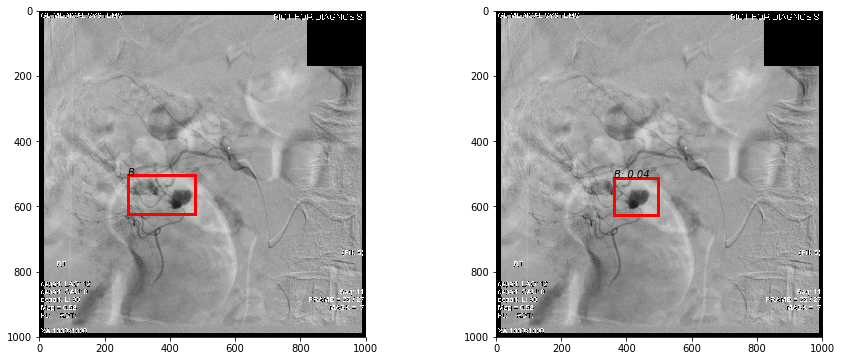

In [32]:
# Prediction of second image
img_1, bbs_1, lbs1 = dataset_test[20]
model.score_thresh = 0.0001
bboxes, labels, scores = model.predict([img_1])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1, 2, 2)
ax2 = fig.add_subplot(1, 2, 1)
# plot prediction
visualization.vis_bbox(img_1, bboxes[0], labels[0], scores[0], label_names=bbox_label_names, ax=ax1)
# plot ground truth
visualization.vis_bbox(img_1, bbs_1, lbs1, label_names=bbox_label_names,ax=ax2)
fig.savefig("test2.png")

[[333.8536  383.49237 389.09134 437.68695]]
[[325. 379. 390. 434.]]


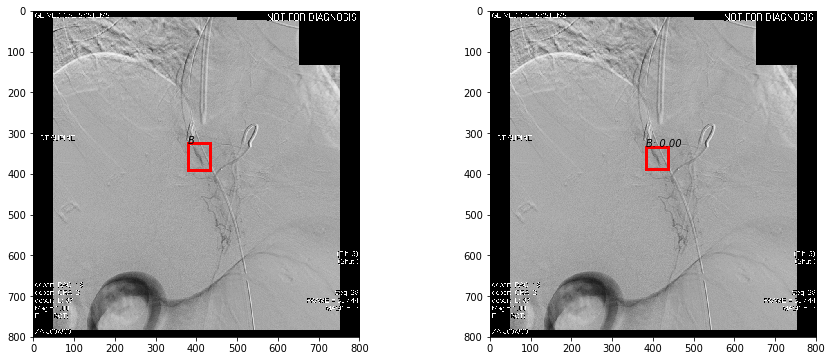

In [33]:
# Prediction of third image
img_1, bbs_1, lbs1 = dataset_test[5]
model.score_thresh = 0.0001
bboxes, labels, scores = model.predict([img_1])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1, 2, 2)
ax2 = fig.add_subplot(1, 2, 1)
# plot prediction
visualization.vis_bbox(img_1, bboxes[0], labels[0], scores[0], label_names=bbox_label_names, ax=ax1)
# plot ground truth
visualization.vis_bbox(img_1, bbs_1, lbs1, label_names=bbox_label_names,ax=ax2)
fig.savefig("test3.png")

In [34]:
print scores

[array([0.0021717], dtype=float32)]
